<a href="https://colab.research.google.com/github/vicpb/deep-learning-cnn-udemy/blob/main/ANNRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

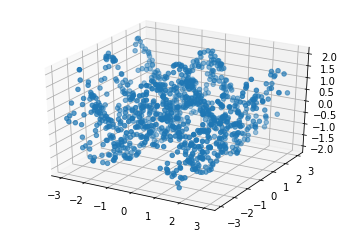

In [5]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
#plt.show()

In [7]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [8]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 703us/step - loss: 0.9767
Epoch 2/100
32/32 [==============================] - 0s 697us/step - loss: 0.9253
Epoch 3/100
32/32 [==============================] - 0s 888us/step - loss: 0.9073
Epoch 4/100
32/32 [==============================] - 0s 839us/step - loss: 0.8763
Epoch 5/100
32/32 [==============================] - 0s 717us/step - loss: 0.8381
Epoch 6/100
32/32 [==============================] - 0s 791us/step - loss: 0.7516
Epoch 7/100
32/32 [==============================] - 0s 749us/step - loss: 0.7247
Epoch 8/100
32/32 [==============================] - 0s 990us/step - loss: 0.7909
Epoch 9/100
32/32 [==============================] - 0s 906us/step - loss: 0.6583
Epoch 10/100
32/32 [==============================] - 0s 713us/step - loss: 0.6135
Epoch 11/100
32/32 [==============================] - 0s 782us/step - loss: 0.5776
Epoch 12/100
32/32 [==============================] - 0s 819us/step - loss: 0.5328
Epoch 13/100


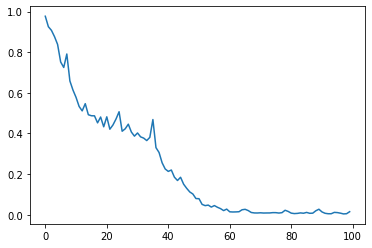

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

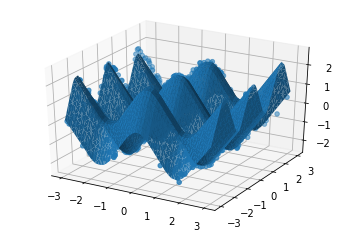

In [10]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

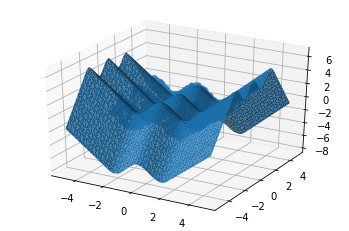

In [11]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()